# Titanic_ML_Notebook
___

We'll be trying to predict a classification- survival or deceased.

## Import Libraries

In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score

## The Data

In [546]:
train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

In [547]:
train.shape

(891, 12)

In [548]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [549]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [550]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



    Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    sibsp - Number of Siblings/Spouses Aboard
    parch - Number of Parents/Children Aboard
    embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [551]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [552]:
# train.corr()

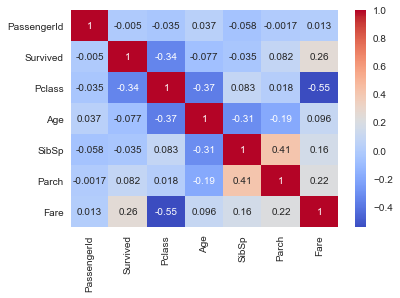

In [553]:
sns.heatmap(train.corr(),annot=True, cmap="coolwarm");

# Exploratory Data Analysis


## Missing Data

In [554]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

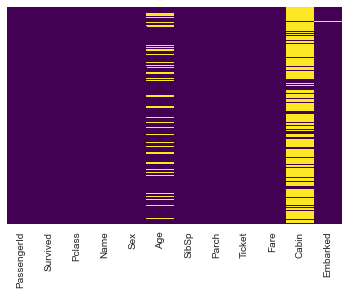

In [555]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation.

## Visualization of the Data

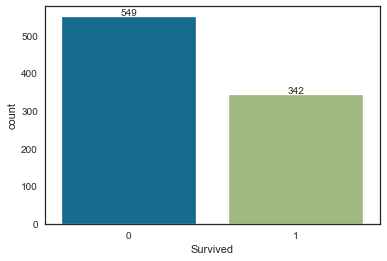

In [556]:
sns.set_style("ticks")
ax=sns.countplot(x='Survived', data=train)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+5));

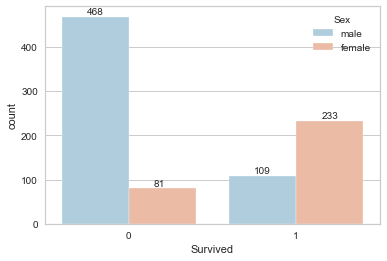

In [557]:
sns.set_style('whitegrid')
ax=sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')


for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5));

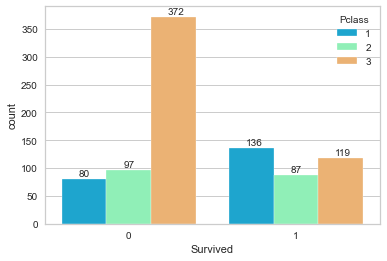

In [558]:
sns.set_style('whitegrid')
ax=sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5));

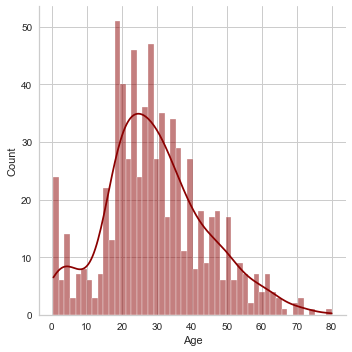

In [559]:
sns.displot(train['Age'].dropna(),kde=True,color='darkred',bins=50);

In [560]:
# alternative with histplot

# sns.histplot(df.Age.dropna(),bins=50,kde=True ) 

In [561]:
# alternative with pandas

# train['Age'].hist(bins=50,color='darkred',alpha=0.6);
# alpha is the transparency ratio of the histogram

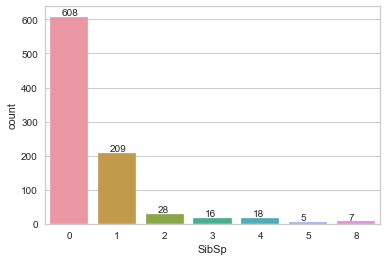

In [562]:
ax=sns.countplot(x='SibSp',data=train)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5));

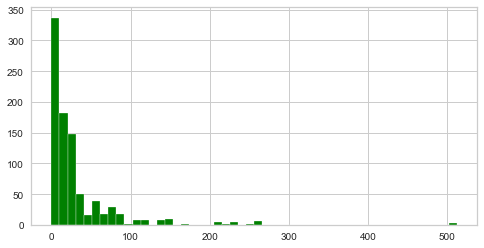

In [563]:
train['Fare'].hist(color='green',bins=50,figsize=(8,4));

## Data Cleaning

####   >> Filling 'Age'

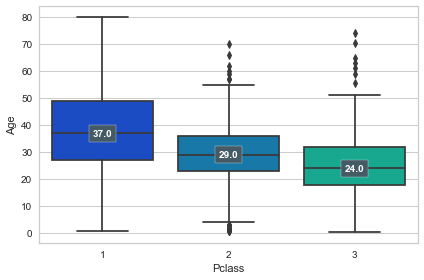

In [564]:
box_plot = sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

In [565]:
# Alternate
# sns.boxenplot(x="Pclass", y='Age', data =train, palette = 'winter');

    >> We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [566]:
def impute_age(cols):
    Age, Pclass = cols[0], cols[1]  
    if pd.isnull(Age):
        if Pclass == 1:return 37
        elif Pclass == 2:return 29
        else:return 24
    else:return Age

In [567]:
# alternative

# df['Age']=df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean').round())

In [568]:
# alternative

# for index in train.Age.index:
#     for Pclass in train.Pclass:
#         if pd.isnull(train["Age"].loc[index]):
#             train["Age"].iloc[index] = train.loc[train.Pclass == Pclass]["Age"].median()

In [569]:
# alternate
# if Pclass == 1:
#             return train[train["Pclass"] == 1].Age.median()
#         elif Pclass == 2:
#             return train[train["Pclass"] == 2].Age.median()
#         else:
#             return train[train["Pclass"] == 3].Age.median()

In [570]:
# alternate
# train['Age']=train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'))

In [571]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

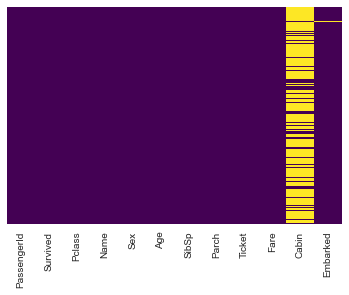

In [572]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [573]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

    >> There were 177 Nan in 'Age' column. We filled them using 'Pclass' column. There is no Nan in 'Age' column anymore.

####   >> Filling 'Cabin'

In [574]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

    >> Cleaning 'Cabin' column via Regex

In [575]:
import re

In [576]:
train.Cabin.str.extract('(\w)')[0].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [577]:
train['Cabin']=train.Cabin.str.extract('(\w)')[0]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


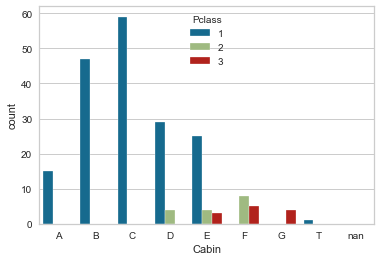

In [578]:
sns.countplot(x='Cabin',data=train, hue='Pclass', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', np.nan]);

    >> We can asign like that 1st class: C cabin, 2nd class: F cabin, 3th class: G cabin

In [579]:
def impute_cabin(cols):
    Cabin,Pclass = cols[0], cols[1]
    
    if pd.isnull(Cabin):
        if Pclass == 1: return 'C'
        elif Pclass == 2: return 'F'
        else: return 'G'
    else: return Cabin

In [580]:
train['Cabin'] = train[['Cabin','Pclass']].apply(impute_cabin,axis=1)

In [581]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S


####   >> Filling 'Embarked'

In [582]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

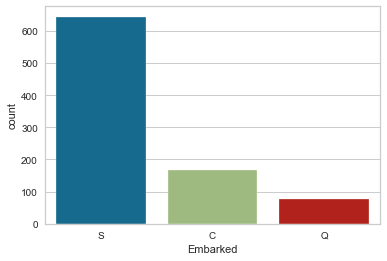

In [583]:
sns.countplot(x='Embarked',data=train);

    >> Mode of "Embarked" column is 'S'. We can assign "S" to Nan

In [584]:
train['Embarked'].fillna('S',inplace=True)

In [585]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Converting Categorical Features 

Converting categorical features to dummy variables.

In [586]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [587]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [588]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [589]:
train.Cabin.unique()

array(['G', 'C', 'E', 'F', 'D', 'A', 'B', 'T'], dtype=object)

In [590]:
#  We have to use drop_first to refrain dummy trap. 
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],prefix='Embark',drop_first=True)
cabin = pd.get_dummies(train['Cabin'], prefix='Cabin', drop_first=True)

In [591]:
train.drop(['Sex','Embarked','Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [592]:
train = pd.concat([train,sex,embark,cabin],axis=1)

In [593]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Embark_Q,Embark_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,1,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,1,0


## Normalization

In [594]:
X = train.drop('Survived',axis=1).iloc[:, :].values

In [595]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()

X = norm.fit_transform(X)
pd.DataFrame(X, columns=train.drop('Survived',axis=1).columns).head()

,Pclass,Age,SibSp,Parch,Fare,male,Embark_Q,Embark_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Our data is ready for our model!

# Building a Logistic Regression Model

## Train Test Split

In [596]:
from sklearn.model_selection import train_test_split

In [597]:
X= train.drop('Survived',axis=1)
y=train['Survived']

In [598]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=52)

## Training and Predicting

In [599]:
from sklearn.linear_model import LogisticRegression

In [600]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [601]:
y_pred = model.predict(X_test)

## Evaluation

## Evaluation Metrics

We can check precision,recall,f1-score using classification report!

####   >> Confusion Matrix

In [602]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import scikitplot.metrics as splt

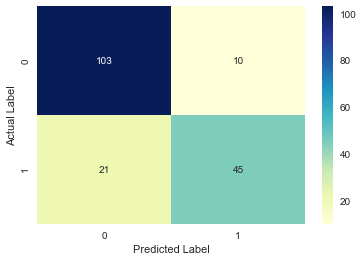

In [603]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

In [604]:
# Alternative
# splt.plot_confusion_matrix(y_test, y_pred);


####   >> Confusion Matrix Scores

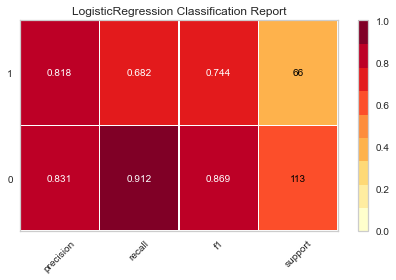

In [605]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
visualizer = ClassificationReport(model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

    >> In logistic regression, F1 Score is important
    
    >> Recall degerinin sifirlar icin daha yuksek olmasi onemli. Sayet sifirlar icin recall precision dan dan kucuk olsaydi modelimiz acisindan sorun var denebilirdi.
    
    >> Confusion Matrix te O lar daha onemli. Cunku bir afette canli sayisini degil, olu sayisini sorariz. Tabloda 'Survived' sutunu oldugundan 'Survived-False' olan O larin Precision-Recall-F1 scores a bakariz.

In [606]:
# Alternative
# print('Classification Report :\n',classification_report(y_test, y_pred))

####   >> ROC Curve
       
ROC is a probability curve, ROC Score (AUC) is a measure of a classifier's ability to distinguish between classes and is used as a summary of the ROC curve.

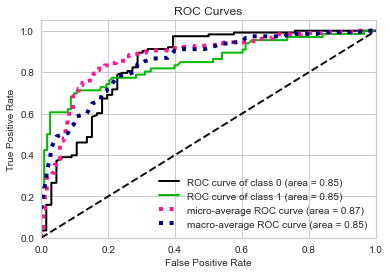

In [607]:
# Calculation of probability values
y_pred_proba = model.predict_proba(X_test)
splt.plot_roc(y_test, y_pred_proba);

####   >> Cross Validation

In [608]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
print('CV Accuracy Scores:', scores.mean())

CV Accuracy Scores: 0.8020539906103286


In [609]:
scores = cross_val_score(model, X_test, y_test, cv=10)
print('CV Accuracy Scores:', scores.mean())

CV Accuracy Scores: 0.8101307189542484


In [610]:
# R2_score: modelin veriyi yüzdelik oranda temsil etme kabiliyeti
model.score(X_train,y_train)

0.8202247191011236

In [611]:
model.score(X_test,y_test)

0.8268156424581006

### Brainstorming on the Result
    
    >> if the differance between train and test R2 score is small, no overfitting
    
    >> Scaling did not improve our model !
    
    >> Generally, Our model is succesful !
        F1 Score: 0.87
        Recall: 0.91
        Precision: 0.83
        ROC score: 0.87
        CV Score:0.81
        R2 Score: 0.83